Q1. What are the features / variables in the data that actually affect my sourcing price in LR model ? #Q2. How would you explain the sensitivity of the price to the variables in the LR model? #Q3. Which metric to look up if Keerthi wants to know how good is the model fit and pls interpret it? #Q4. What is regularization and how has it helped to improve the model? #Q5. Rerun the analysis with price as an independent variable along with the previous independent variables and see if you can predict the carat. (Provide your code + analysis of your results)

In [2]:
import numpy as np
import math 
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv(r'C:\Users\USER\Downloads\diamonds.csv') 

print (data)

       Unnamed: 0  carat        cut color clarity  depth  table  price     x  \
0               1   0.23      Ideal     E     SI2   61.5   55.0    326  3.95   
1               2   0.21    Premium     E     SI1   59.8   61.0    326  3.89   
2               3   0.23       Good     E     VS1   56.9   65.0    327  4.05   
3               4   0.29    Premium     I     VS2   62.4   58.0    334  4.20   
4               5   0.31       Good     J     SI2   63.3   58.0    335  4.34   
...           ...    ...        ...   ...     ...    ...    ...    ...   ...   
53935       53936   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75   
53936       53937   0.72       Good     D     SI1   63.1   55.0   2757  5.69   
53937       53938   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66   
53938       53939   0.86    Premium     H     SI2   61.0   58.0   2757  6.15   
53939       53940   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83   

          y     z  
0      3.98  2.43  

In [4]:
data.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [5]:
data.tail()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,53940,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [7]:
data.drop(['Unnamed: 0'] , axis=1 , inplace=True)
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [11]:
data.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [12]:
data.describe

<bound method NDFrame.describe of        carat        cut color clarity  depth  table  price     x     y     z
0       0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1       0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2       0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3       0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4       0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
...      ...        ...   ...     ...    ...    ...    ...   ...   ...   ...
53935   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75  5.76  3.50
53936   0.72       Good     D     SI1   63.1   55.0   2757  5.69  5.75  3.61
53937   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66  5.68  3.56
53938   0.86    Premium     H     SI2   61.0   58.0   2757  6.15  6.12  3.74
53939   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83  5.87  3.64

[53940 rows x 10 columns]>

In [14]:
data.loc[(data['x']==0) | (data['y']==0) | (data['z']==0)]

,carat,cut,color,clarity,depth,table,price,x,y,z
2207,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,0.0
2314,1.01,Premium,H,I1,58.1,59.0,3167,6.66,6.60,0.0
4791,1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,0.0
5471,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,0.0
10167,1.50,Good,G,I1,64.0,61.0,4731,7.15,7.04,0.0
11182,1.07,Ideal,F,SI2,61.6,56.0,4954,0.00,6.62,0.0
11963,1.00,Very Good,H,VS2,63.3,53.0,5139,0.00,0.00,0.0
13601,1.15,Ideal,G,VS2,59.2,56.0,5564,6.88,6.83,0.0
15951,1.14,Fair,G,VS1,57.5,67.0,6381,0.00,0.00,0.0
24394,2.18,Premium,H,SI2,59.4,61.0,12631,8.49,8.45,0.0


In [16]:
len(data[(data['x']==0) | (data['y']==0) | (data['z']==0)])

20

In [20]:
data = data[(data[['x','y','z']] != 0).all(axis=1)]

In [21]:
data.loc[(data['x']==0) | (data['y']==0) | (data['z']==0)]

,carat,cut,color,clarity,depth,table,price,x,y,z


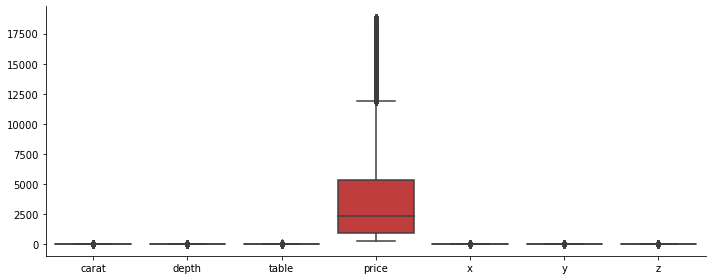

In [26]:
sns.factorplot(data=data , kind='box' , size=4, aspect=2.5)

Q2. How would you explain the sensitivity of the price to the variables in the LR model?

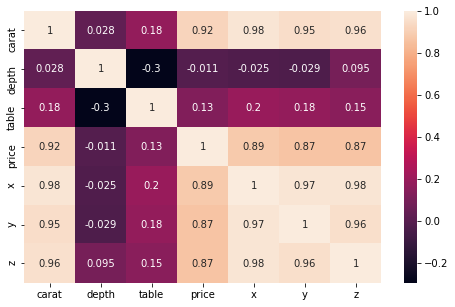

In [28]:
plt.figure(figsize= (8, 5))

sns.heatmap(data.corr(), annot= True);

Q3. Which metric to look up if Keerthi wants to know how good is the model fit and pls interpret it?

R-squared metrics.explained_variance_score(y_test, predictions). For regression, one of the matrices we've to get the score is R-squared

Q4. What is regularization and how has it helped to improve the model? Regularization is a term for the methods used to adjust machine learning models so that the adjusted loss function is as small as possible and overfitting or underfitting doesn't happen.

A standard least squares model tends to have some variation, which means that it won't work well with data that is different from its training data. Regularization reduces the model's variance by a lot without making its bias worse by much.

Q5. Rerun the analysis with price as an independent variable along with the previous independent variables and see if you can predict the carat. (Provide your code + analysis of your results)

In [31]:
X= data.drop(["price"],axis =1)
y= data["price"]

In [34]:
%matplotlib inline
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.compose import ColumnTransformer

In [35]:
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder())])

In [38]:
numeric_features = data.select_dtypes(include=['int64', 'float64']).drop(['price'], axis=1).columns
categorical_features = data.select_dtypes(include=['object']).columns
categorical_features

Index(['cut', 'color', 'clarity'], dtype='object')

In [39]:
numeric_features

Index(['carat', 'depth', 'table', 'x', 'y', 'z'], dtype='object')

In [40]:
from sklearn.compose import ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

In [41]:
#split the data for training and testing 
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state=7)

In [43]:
#pipline for linear regression model
pipeline_lr=Pipeline([("preprocessor",preprocessor),
                     ("lr_reg",LinearRegression())])

In [44]:
#pipline for Random Forest Regressor/
pipeline_rf=Pipeline([("preprocessor",preprocessor),
                     ("rf_reg",RandomForestRegressor())])

In [46]:
#pipline for KNeighbors Regressor
pipeline_kn=Pipeline([("preprocessor",preprocessor),
                     ("rf_reg",KNeighborsRegressor())])


In [47]:
#pipline for Suport Vector  Regressor
pipeline_svm=Pipeline([("preprocessor",preprocessor),
                     ("svm_reg",SVR())])

In [48]:
#pipline for Decision Tree Regressor
pipeline_dt=Pipeline([("preprocessor",preprocessor),
                     ("dt_reg",DecisionTreeRegressor())])


In [50]:
pipelines = [pipeline_lr, pipeline_dt, pipeline_rf, pipeline_kn, pipeline_svm ]

pipe_dict = {0: "LinearRegression", 1: "DecisionTree", 2: "RandomForest",3: "KNeighbors", 4: "Support Vector"}

In [51]:
for pipe in pipelines:
    pipe.fit(X_train, y_train)

In [52]:
cv_results_rms = []
for i, model in enumerate(pipelines):
    cv_score = cross_val_score(model, X_train,y_train,scoring="neg_root_mean_squared_error", cv=5)
    cv_results_rms.append(cv_score)
    print("%s : %f " % (pipe_dict[i], cv_score.mean()))

LinearRegression : -1151.085521 
DecisionTree : -767.227981 
RandomForest : -559.134253 
KNeighbors : -799.226678 
Support Vector : -2933.145963 


In [54]:
pred = pipeline_rf.predict(X_test)
print("R^2:",metrics.r2_score(y_test, pred))
print("Adjusted R^2:",1 - (1-metrics.r2_score(y_test, pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, pred)))

R^2: 0.9802382955149613
Adjusted R^2: 0.9802250917035014
RMSE: 560.7196194673685


R^2: 0.9802382955149613
Adjusted R^2: 0.9802250917035014